## Apprentissage supervise

### Importation des librairies

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

### Lecture des donnees pretraitees

In [36]:
datas = pd.read_csv("../data/output/cleaned_datas.csv")

In [37]:
datas.head()

,Unnamed: 0,category,medicine_name,therapeutic_area,common_name,active_substance,patient_safety,authorisation_status,additional_monitoring,generic,biosimilar,conditional_approval,exceptional_circumstances,accelerated_assessment,orphan_medicine,marketing_authorisation_holder_company_name,pharmacotherapeutic_group,revision_number
0,0,human,Adcetris,"Lymphoma, Non-Hodgkin; Hodgkin Disease",brentuximab vedotin,brentuximab vedotin,False,authorised,False,False,False,False,False,False,True,Takeda Pharma A/S,Antineoplastic agents,34.0
1,1,human,Nityr,Tyrosinemias,nitisinone,nitisinone,False,authorised,False,True,False,False,False,False,False,Cycle Pharmaceuticals (Europe) Ltd,"Other alimentary tract and metabolism products,",4.0
2,2,human,Ebvallo,Lymphoproliferative Disorders,tabelecleucel,tabelecleucel,False,authorised,True,False,False,False,True,False,True,Pierre Fabre Medicament,NaN,2.0
3,3,human,Ronapreve,COVID-19 virus infection,"casirivimab, imdevimab","casirivimab, imdevimab",False,authorised,True,False,False,False,False,False,False,Roche Registration GmbH,"Immune sera and immunoglobulins,",3.0
4,4,human,Cosentyx,"Arthritis, Psoriatic; Psoriasis; Spondylitis...",secukinumab,secukinumab,False,authorised,False,False,False,False,False,False,False,Novartis Europharm Limited,Immunosuppressants,30.0


### Phase de pretraitement avant entrainement

Dans cette phase, nous supprimons les colonnes qui continnenet des valeurs nulles et les lignes qui qui en contiennent egalement

In [38]:
datas.drop(columns="Unnamed: 0", axis=1, inplace=True)
#datas.drop(index=1528, axis=0, inplace=True)

In [39]:
null_values_in_column = datas[datas["authorisation_status"].isna()]
print(null_values_in_column)
datas.drop(index=1528, axis=0, inplace=True)

     category medicine_name therapeutic_area common_name active_substance  \
1528    human       Aplidin              NaN         NaN              NaN   

      patient_safety authorisation_status  additional_monitoring  generic  \
1528           False                  NaN                  False    False   

      biosimilar  conditional_approval  exceptional_circumstances  \
1528       False                 False                      False   

      accelerated_assessment  orphan_medicine  \
1528                   False             True   

     marketing_authorisation_holder_company_name pharmacotherapeutic_group  \
1528                                         NaN                       NaN   

      revision_number  
1528              NaN  


- Separation de la variable cible et des variables explicatives

In [40]:
y = datas["authorisation_status"]
X = datas.drop(["authorisation_status"], axis=1)

- Visualisation de la distribution de la variable cible

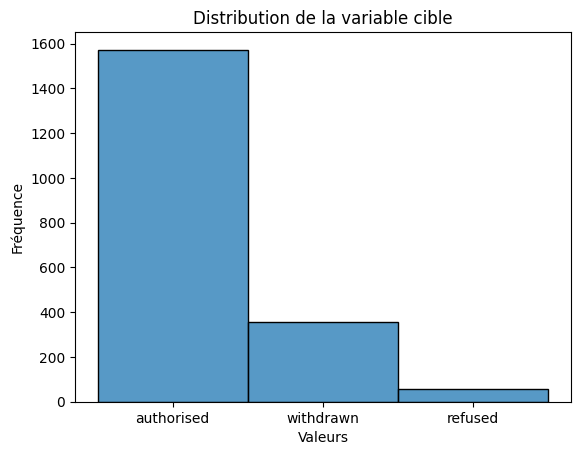

In [41]:
sns.histplot(y)
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.title('Distribution de la variable cible')
plt.show()

- Encodage des variables categorielles

In [42]:
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
encoder = LabelEncoder()

for categ in categorical_columns:
    dict_col=encoder.fit(X[categ])  
    X[categ] = encoder.transform(X[categ])
    
encoder_2 = OneHotEncoder()
encoder_2.fit(X)

OneHotEncoder()

In [43]:
X

,category,medicine_name,therapeutic_area,common_name,active_substance,patient_safety,additional_monitoring,generic,biosimilar,conditional_approval,exceptional_circumstances,accelerated_assessment,orphan_medicine,marketing_authorisation_holder_company_name,pharmacotherapeutic_group,revision_number
0,0,25,394,163,162,False,False,False,False,False,False,False,True,534,66,34.0
1,0,1051,635,820,872,False,False,True,False,False,False,False,False,166,257,4.0
2,0,421,400,1106,1188,False,True,False,False,False,True,False,True,450,365,2.0
3,0,1447,107,214,216,False,True,False,False,False,False,False,False,475,164,3.0
4,0,319,62,1043,1120,False,False,False,False,False,False,False,False,404,209,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,0,896,190,634,671,False,False,False,False,False,False,False,False,201,224,0.0
1984,0,425,204,337,351,False,False,False,False,False,False,False,False,516,114,0.0
1985,0,426,451,989,1064,False,False,False,False,False,False,False,False,477,86,0.0
1986,0,1287,277,327,341,False,False,False,False,False,False,False,False,432,331,0.0


- Suppression des colonnes avec des valeurs nulles 

In [44]:
X.drop(columns="revision_number", axis=1, inplace=True)

In [45]:
#categorical_columns = X.select_dtypes(include=['object', 'category']).columns
#for categ in categorical_columns:
    #print(X[categ])

- Standardisation des variables explicatives 

Vu que notre dataset contient principalement que des variables categorielles, nous allons les standardiser

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- Splitting des donnees en train et test 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3)

Nous voyons que notre variable cible est tres inegalement distribue entre les classes. Pour mettre en place nos modeles, nous allons dans un premeir temps les entrainer avec le "desequilibre de classe" avant d'appliquer la technique de "sampling" puis les entrainer de nouveau. A la fin nous ferons une comparaison des modeles dans les deux cas 

### Entrainement avec les donnees "unbalanced" de la classe cible

Dans un premier temps nous allons faire l'entrainement de nos modeles sur les donnees en conservant le desequilibre de classe sur la variable cible et voir les resultats 

#### Regression logistique

In [48]:
model_rl= LogisticRegression(C=0.1, penalty='l2', max_iter=1000, multi_class='ovr')
model_rl.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, multi_class='ovr')

In [49]:
y_pred = model_rl.predict(X_test)

# Évaluez la performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("The accuracy is {}".format(accuracy))
print(report)

The accuracy is 0.7889447236180904
              precision    recall  f1-score   support

  authorised       0.79      1.00      0.88       471
     refused       0.00      0.00      0.00        14
   withdrawn       0.00      0.00      0.00       112

    accuracy                           0.79       597
   macro avg       0.26      0.33      0.29       597
weighted avg       0.62      0.79      0.70       597



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Nous voyons que notre modele est en surapprentissage en se basant sur les resultats de `f1-score`,`recall` et `precision`. En effet les metriques sont nulles pour les classes minoritaires `refused` et `withdrawn`.

- Optimisation des hyperparametres du modele


Nous allons faire l'optimisation des hyperparametres pour ameliorer les performances du modele

In [50]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'max_iter': [100, 200, 300]
}

#grid_search = GridSearchCV(model_rl, param_grid, scoring='f1_micro', cv=5)
#grid_search.fit(X_train, y_train)

random_search = RandomizedSearchCV(model_rl, param_distributions=param_grid, n_iter=10, scoring='f1_micro', cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(C=0.1, max_iter=1000,
                                                multi_class='ovr'),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l2']},
                   scoring='f1_micro')

In [51]:
best_params = random_search.best_params_

In [52]:
best_params

{'penalty': 'l2', 'max_iter': 100, 'C': 0.1}

In [53]:
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [54]:
y_pred = best_model.predict(X_test)

# Évaluez la performance
#accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

  authorised       0.79      1.00      0.88       471
     refused       0.00      0.00      0.00        14
   withdrawn       0.00      0.00      0.00       112

    accuracy                           0.79       597
   macro avg       0.26      0.33      0.29       597
weighted avg       0.62      0.79      0.70       597



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Malgre, l'optimisation nous voyons clairement que les metriques sont nulles pour les classes minoritaires `refused` et `withdrawn`. Nous allons utiliser la matrice de confusion pour mieux visualiser les resultats

- Matrice de confusion

In [55]:
import numpy as np
import seaborn as sns

Matrice de Confusion :
 [[471   0   0]
 [ 14   0   0]
 [112   0   0]]
[0 1 2]
['authorised' 'refused' 'withdrawn']


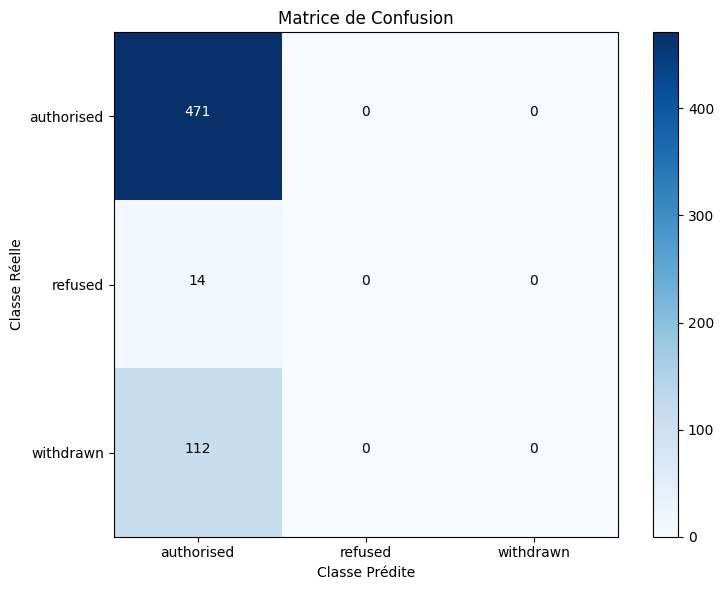

In [56]:
confusion = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion (en tant que tableau)
print("Matrice de Confusion :\n", confusion)

# Visualisation de la répartition des classes prédites vs réelles
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.colorbar()


classes = np.unique(y.values)
tick_marks = np.arange(len(classes))
print(tick_marks)
print(classes)
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.ylabel('Classe Réelle')
plt.xlabel('Classe Prédite')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(confusion[i, j]), horizontalalignment="center", color="white" if confusion[i, j] > confusion.max() / 2 else "black")

plt.tight_layout()
plt.show()

Toutes les predictions sont faites sur la classe majoritaire pour ce modele

#### RandomForestModel

In [58]:
model_rf = RandomForestClassifier()

In [59]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
y_pred = model_rf.predict(X_test)

# Évaluez la performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("The accuracy is {}".format(accuracy))
print(report)

The accuracy is 0.8023450586264657
              precision    recall  f1-score   support

  authorised       0.82      0.97      0.89       471
     refused       0.67      0.14      0.24        14
   withdrawn       0.60      0.19      0.29       112

    accuracy                           0.80       597
   macro avg       0.69      0.43      0.47       597
weighted avg       0.77      0.80      0.76       597



Les resultats sont legerement meilleurs que ceux obtenus avec la Regression Logistique. Le `rappel`, la `precision` et la `f1` score par classe sont meilleurs que ceux obtenus avec la Regression Logistique

- Optimisation du modele

In [61]:
param_dist = {
    'n_estimators': range(10,100,10),  # Nombre d'arbres
    'max_depth': [1, 10, 20, 30, 40,50]  # Profondeur maximale
}

In [62]:
random_search = RandomizedSearchCV(model_rf, param_distributions=param_dist, n_iter=10, scoring='f1_micro', cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 10, 20, 30, 40, 50],
                                        'n_estimators': range(10, 100, 10)},
                   scoring='f1_micro')

In [63]:
best_params_rf = random_search.best_params_

In [64]:
best_params_rf

{'n_estimators': 50, 'max_depth': 30}

In [65]:
best_model = RandomForestClassifier(**best_params_rf)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=50)

In [66]:
y_pred = best_model.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

  authorised       0.82      0.97      0.89       471
     refused       0.50      0.07      0.12        14
   withdrawn       0.67      0.21      0.32       112

    accuracy                           0.81       597
   macro avg       0.66      0.42      0.45       597
weighted avg       0.78      0.81      0.77       597



Matrice de Confusion :
 [[458   1  12]
 [ 13   1   0]
 [ 88   0  24]]
[0 1 2]
['authorised' 'refused' 'withdrawn']


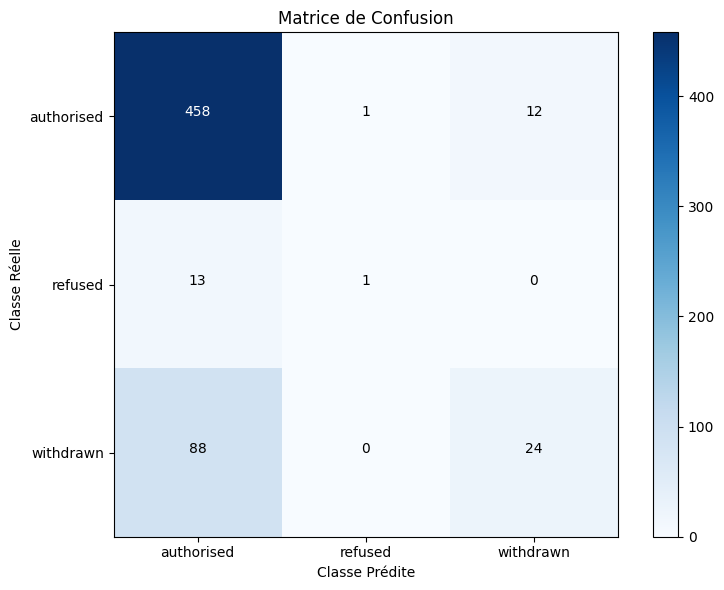

In [67]:
confusion = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion (en tant que tableau)
print("Matrice de Confusion :\n", confusion)

# Visualisation de la répartition des classes prédites vs réelles
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.colorbar()


classes = np.unique(y.values)
tick_marks = np.arange(len(classes))
print(tick_marks)
print(classes)
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.ylabel('Classe Réelle')
plt.xlabel('Classe Prédite')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(confusion[i, j]), horizontalalignment="center", color="white" if confusion[i, j] > confusion.max() / 2 else "black")

plt.tight_layout()
plt.show()

Le poids de la classe majoritaire fait toujours que les resultats obtenus sont biaises.

#### XGBoost

Encodage de la variable cible

In [68]:
encoder = OneHotEncoder(sparse=False)

In [69]:
one_ytrain_encoded= encoder.fit_transform(y_train.values.reshape(-1,1))

/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [70]:
one_ytest_encoded = encoder.fit_transform(y_test.values.reshape(-1,1))

/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Entrainement

In [71]:
model_xgb = XGBClassifier(n_estimators=100, max_depth=20)

In [72]:
model_xgb.fit(X_train, one_ytrain_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
y_pred = model_xgb.predict(X_test)

In [74]:
report = classification_report(one_ytest_encoded, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       471
           1       0.33      0.14      0.20        14
           2       0.53      0.27      0.36       112

   micro avg       0.80      0.79      0.80       597
   macro avg       0.57      0.45      0.48       597
weighted avg       0.77      0.79      0.77       597
 samples avg       0.78      0.79      0.78       597



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Par rapport au `f1-score`, on observe une legere amelioeration comparee au modele RandomForest sur les classes minoritaires

- Optimisation de notre modele

In [75]:
!pip3 install scikit-learn scikit-optimize


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [76]:
from skopt.space import Real, Integer
from skopt import BayesSearchCV

In [77]:
param_space = {
    'n_estimators': Integer(100, 1000),  # Nombre d'arbres
    'max_depth': Integer(3, 10),  # Profondeur maximale
    'learning_rate': Real(0.01, 0.3),  # Taux d'apprentissage
    'subsample': Real(0.5, 1.0),  # Fraction d'échantillons utilisés pour l'apprentissage de chaque arbre
    'colsample_bytree': Real(0.5, 1.0),  # Fraction de colonnes utilisées pour l'apprentissage de chaque arbre
    'gamma': Real(0, 1.0)  # Paramètre de régularisation
}


In [78]:
bayes_search = BayesSearchCV(model_xgb, param_space, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

In [79]:
bayes_search.fit(X_train, one_ytrain_encoded)

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None...
                             'gamma': Real(low=0, high=1.0, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=0.3, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=1000, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [80]:
best_params = bayes_search.best_params_

In [81]:
best_params

OrderedDict([('colsample_bytree', 0.7244912988854574),
             ('gamma', 1.0),
             ('learning_rate', 0.01),
             ('max_depth', 8),
             ('n_estimators', 703),
             ('subsample', 0.5)])

In [82]:
best_model = XGBClassifier(**best_params)

In [83]:
best_model.fit(X_train, one_ytrain_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7244912988854574, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=703, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [84]:
y_pred = best_model.predict(X_test)

# Évaluez la performance
#accuracy = accuracy_score(y_test, y_pred)
report = classification_report(one_ytest_encoded, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.81      0.97      0.89       471
           1       1.00      0.14      0.25        14
           2       0.69      0.16      0.26       112

   micro avg       0.81      0.80      0.81       597
   macro avg       0.84      0.43      0.47       597
weighted avg       0.80      0.80      0.75       597
 samples avg       0.80      0.80      0.80       597



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Malgre l'optimisation le `f1-score` reste inferieur qu'avant optimisation

Matrice de confusion

In [85]:
"""confusion = confusion_matrix(one_ytest_encoded, y_pred)

# Afficher la matrice de confusion (en tant que tableau)
print("Matrice de Confusion :\n", confusion)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()"""

'confusion = confusion_matrix(one_ytest_encoded, y_pred)\n\n# Afficher la matrice de confusion (en tant que tableau)\nprint("Matrice de Confusion :\n", confusion)\n\nsns.heatmap(confusion, annot=True, fmt=\'d\', cmap=\'Blues\')\nplt.xlabel(\'Prédictions\')\nplt.ylabel(\'Vraies étiquettes\')\nplt.show()'

### Entrainement sur les donnees reequilibrees 

Dans cette partie nous allons continuer l'apprentissage supervise mais en appliquant une technique de reequilibrage sur les classes de notre variable cible

- Oversampling en utilisant SMOTE

Installation

In [86]:
!pip3 install -U imbalanced-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [89]:
y_resampled

0       authorised
1       authorised
2       authorised
3       authorised
4       authorised
           ...    
4714     withdrawn
4715     withdrawn
4716     withdrawn
4717     withdrawn
4718     withdrawn
Name: authorisation_status, Length: 4719, dtype: object

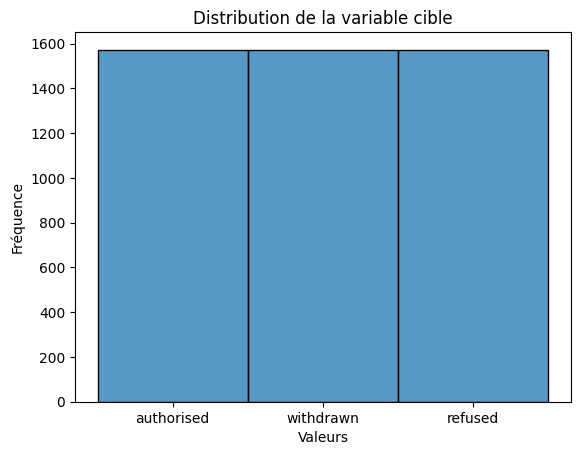

In [135]:
sns.histplot(y_resampled)
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.title('Distribution de la variable cible')
plt.show()

Avec cette technique, nous voyons maintenant que les classes de notre variable cible sont equi-distribuees

- Split des donneees

In [91]:
X_train_resamp, X_test_resamp, y_train_resamp, y_test_resamp = train_test_split(X_resampled, y_resampled, test_size=0.3)

#### Entrainement

- Regression Logistique

In [92]:
model_rl_rs = LogisticRegression(C=0.1, penalty='l2', max_iter=1000, multi_class='ovr')

In [93]:
model_rl_rs.fit(X_train_resamp, y_train_resamp)

LogisticRegression(C=0.1, max_iter=1000, multi_class='ovr')

In [94]:
y_predict_resamp = model_rl_rs.predict(X_test_resamp)

In [95]:
report = classification_report(y_test_resamp, y_predict_resamp)
print(report)

              precision    recall  f1-score   support

  authorised       0.73      0.58      0.65       477
     refused       0.57      0.63      0.60       473
   withdrawn       0.46      0.51      0.48       466

    accuracy                           0.57      1416
   macro avg       0.59      0.57      0.58      1416
weighted avg       0.59      0.57      0.58      1416



Sans `optimisation`, on obtient de meilleurs `precision`, `rappel` et `f1-score` par rapport a la Regression LOgistique sur les donnees desequilibrees 

- Optimisation du modele 

In [105]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'max_iter': range(300,1000)
}

#grid_search = GridSearchCV(model_rl, param_grid, scoring='f1_micro', cv=5)
#grid_search.fit(X_train, y_train)

random_search = RandomizedSearchCV(model_rl_rs, param_distributions=param_grid, n_iter=10, scoring='f1_micro', cv=5)
random_search.fit(X_train_resamp, y_train_resamp)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(C=0.1, max_iter=1000,
                                                multi_class='ovr'),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'max_iter': range(300, 1000),
                                        'penalty': ['l2']},
                   scoring='f1_micro')

In [107]:
best_params = random_search.best_params_
best_model = LogisticRegression(**best_params)
best_model.fit(X_train_resamp, y_train_resamp)

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, max_iter=686)

In [104]:
y_pred = best_model.predict(X_test_resamp)
report = classification_report(y_test_resamp, y_pred)
print(report)

              precision    recall  f1-score   support

  authorised       0.75      0.58      0.65       477
     refused       0.58      0.63      0.61       473
   withdrawn       0.45      0.51      0.48       466

    accuracy                           0.57      1416
   macro avg       0.59      0.57      0.58      1416
weighted avg       0.59      0.57      0.58      1416



Les resultats obtenus avant et apres optimisation sont quasi-identiques

- RandomForestClassifier

In [108]:
model_rf_rs = RandomForestClassifier()

In [109]:
model_rf_rs.fit(X_train_resamp, y_train_resamp)

RandomForestClassifier()

In [110]:
y_pred =  model_rf_rs.predict(X_test_resamp)

report = classification_report(y_test_resamp, y_pred)
print(report)

              precision    recall  f1-score   support

  authorised       0.86      0.80      0.83       477
     refused       0.95      0.99      0.97       473
   withdrawn       0.83      0.87      0.85       466

    accuracy                           0.88      1416
   macro avg       0.88      0.89      0.88      1416
weighted avg       0.88      0.88      0.88      1416



Avec la `f1-score`, on obtient des resultats meilleurs que l'ensemble des models precedents sans meme de faire l'optimisation

- Optimisation du randomForest

In [111]:
param_dist = {
    'n_estimators': range(10,100,10),  # Nombre d'arbres
    'max_depth': [1, 10, 20, 30, 40,50]  # Profondeur maximale
}

In [112]:
random_search = RandomizedSearchCV(model_rf_rs, param_distributions=param_dist, n_iter=10, scoring='f1_micro', cv=5)
random_search.fit(X_train_resamp, y_train_resamp)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 10, 20, 30, 40, 50],
                                        'n_estimators': range(10, 100, 10)},
                   scoring='f1_micro')

In [113]:
best_params =  random_search.best_params_
best_model = RandomForestClassifier(**best_params)

In [114]:
best_model.fit(X_train_resamp, y_train_resamp)

RandomForestClassifier(max_depth=40, n_estimators=50)

In [115]:
y_pred = best_model.predict(X_test_resamp)
report = classification_report(y_test_resamp, y_pred)

print(report)

              precision    recall  f1-score   support

  authorised       0.86      0.81      0.83       477
     refused       0.94      0.99      0.96       473
   withdrawn       0.85      0.85      0.85       466

    accuracy                           0.88      1416
   macro avg       0.88      0.88      0.88      1416
weighted avg       0.88      0.88      0.88      1416



In [ ]:
confusion = confusion_matrix(y_test_resamp, y_pred)

# Afficher la matrice de confusion (en tant que tableau)
print("Matrice de Confusion :\n", confusion)

# Visualisation de la répartition des classes prédites vs réelles
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.colorbar()


classes = np.unique(y.values)
tick_marks = np.arange(len(classes))
print(tick_marks)
print(classes)
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.ylabel('Classe Réelle')
plt.xlabel('Classe Prédite')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(confusion[i, j]), horizontalalignment="center", color="white" if confusion[i, j] > confusion.max() / 2 else "black")

plt.tight_layout()
plt.show()

La matrice de confusion obtenu vient confirmer les performances de ce modele par rapport aux precedents

- XGBoost

Encodage de la variable cible

In [125]:
encoder = OneHotEncoder(sparse=False)

In [126]:
one_ytrain_rs_encoded= encoder.fit_transform(y_train_resamp.values.reshape(-1,1))

/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [127]:
one_ytest_rs_encoded= encoder.fit_transform(y_test_resamp.values.reshape(-1,1))

/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [130]:
model_xgb_rs = XGBClassifier(n_estimators=100, max_depth=20)

In [131]:
model_xgb_rs.fit(X_train_resamp, one_ytrain_rs_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [132]:
y_pred = model_xgb_rs.predict(X_test_resamp)

In [1]:
report = classification_report(one_ytest_encoded, y_pred)

print(report)

NameError: name 'classification_report' is not defined